In [1]:
from google.colab import drive
drive.mount('/gdrive/')

Mounted at /gdrive/


(512, 512)


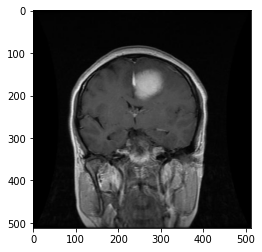

In [4]:
import cv2
import matplotlib.pyplot as plt
a= cv2.imread ('/gdrive/MyDrive/AdvancedSignalProcessing/ED6001_data/Training/meningioma_tumor/m (20).jpg',0) #give image path here
print(a.shape)
plt.imshow(a,cmap='gray')

(array([4.2457e+04, 2.3080e+03, 3.0310e+03, 1.7172e+04, 2.9179e+04,
        1.6265e+04, 1.1401e+04, 7.6460e+03, 3.9260e+03, 2.6040e+03,
        1.8440e+03, 1.3130e+03, 9.6400e+02, 7.6600e+02, 6.0800e+02,
        5.3200e+02, 4.8800e+02, 4.2300e+02, 4.1300e+02, 3.9600e+02,
        4.2600e+02, 3.8900e+02, 3.8800e+02, 4.1100e+02, 3.9100e+02,
        3.4800e+02, 3.6800e+02, 3.9100e+02, 3.6500e+02, 3.9100e+02,
        3.6600e+02, 3.6500e+02, 3.7700e+02, 3.8900e+02, 3.9400e+02,
        4.7000e+02, 4.8800e+02, 4.4600e+02, 5.0700e+02, 4.9800e+02,
        4.9800e+02, 5.9200e+02, 5.9900e+02, 5.8900e+02, 6.5800e+02,
        6.2800e+02, 6.8900e+02, 7.7200e+02, 7.4300e+02, 8.0700e+02,
        9.1900e+02, 9.1800e+02, 1.0180e+03, 1.0940e+03, 1.1640e+03,
        1.2600e+03, 1.2260e+03, 1.3410e+03, 1.4050e+03, 1.4390e+03,
        1.5110e+03, 1.6100e+03, 1.6320e+03, 1.8300e+03, 1.9050e+03,
        2.0540e+03, 2.0640e+03, 2.1800e+03, 2.0880e+03, 2.0990e+03,
        1.9600e+03, 1.9630e+03, 1.8900e+03, 1.91

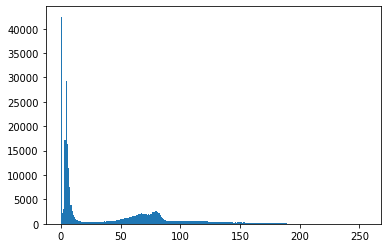

In [5]:

plt.hist(a.ravel(), bins=256) #calculating histogram

(array([42457.,     0.,     0.,  2308.,     0.,     0.,  3031.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0., 17172.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0., 29179.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,     0., 16265.,
            0.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0., 11401.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,  7646.,     0.,     0.,
            0.,     0.,  3926.,     0.,     0.,  2604.,     0., 

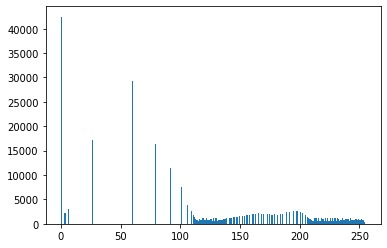

In [6]:
gray_img_eqhist=cv2.equalizeHist(a.astype('uint8'))
plt.hist(gray_img_eqhist.ravel(), bins=256) #calculating histogram

In [7]:
clahe= cv2.createCLAHE(clipLimit =5, tileGridSize=(8,8))
cl = clahe.apply(a.astype('uint8'))

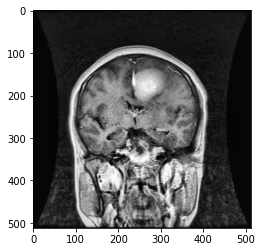

In [8]:
plt.imshow(cl,cmap='gray')

In [9]:
!pip install PyMaxflow
import numpy as np
import matplotlib.pyplot as plt
import imageio



     |████████████████████████████████| 123 kB 9.6 MB/s 
  Created wheel for PyMaxflow: filename=PyMaxflow-1.2.13-cp37-cp37m-linux_x86_64.whl size=527890 sha256=0253196629235215de2f6adf8c50875fe52cf7d3a166f5e8cd8c1ea466f980a3
  Stored in directory: /root/.cache/pip/wheels/62/f9/eb/62e4c1fcbee43e64b749674879fd3248d8c49f08c37c8a564d
Successfully built PyMaxflow


/usr/local/lib/python3.7/dist-packages/maxflow/fastmin.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  binary += V[labels[slice0],labels[slice1]].sum()


[0 1 2 3]


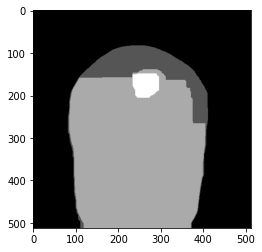

In [11]:
from maxflow.fastmin import aexpansion_grid
from maxflow.fastmin import abswap_grid
I= cl
I = I/I.max()

#Taking label 
L = 5
level = np.arange(0.5/L, 1, 1/L)

# Calculate data cost as the absolute difference between the label prototype and the pixel value
D = np.abs(I.reshape(I.shape+(1,)) - level.reshape((1,1,-1)))

# Generate nearest prototype labeling
Id = np.argmin(D,2)

# Calculate neighbourhood cost as absolute difference between prototypes 
alpha = 10
V = alpha * np.abs( level.reshape((-1,1)) - level.reshape((1,-1)))

# Mimimise data + neighbourhood cost
labels1 = abswap_grid(D,V)
print(np.unique(labels1))
fg = plt.figure("Regularised labeling")
ax1 = fg.add_subplot(1,1,1)
ax1.imshow(labels1,cmap='gray')
